 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
Path.cwd()

WindowsPath('C:/Users/Owner/Desktop/homework/pandas_homework-')

In [5]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
#This will show you get alll the Nulls
result = whale_df.isnull()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [7]:
# Count nulls
whale_df.isnull().sum()

# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
# YOUR CODE HERE  VARIABLE.dropna will drop all the NaN
whale_df.dropna(inplace = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE "../Resources/whale_returns.csv"

algorithmic_daily_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algorithmic_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
# YOUR CODE HERE
algorithmic_daily_returns.isnull().sum



<bound method DataFrame.sum of             Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
2014-06-04   False    True
2014-06-05   False   False
2014-06-06   False   False
2014-06-09   False   False
2014-06-10   False   False
2014-06-11   False   False
2014-06-12   False   False
2014-06-13   False   False
2014-06-16   False   False
2014-06-17   False   False
2014-06-18   False   False
2014-06-19   False   False
2014-06-20   False   False
2014-06-23   False   False
2014-06-24   False   False
2014-06-25   False   False
2014-06-26   False   False
2014-06-27   False   False
2014-06-30   False   False
2014-07-01   False   False
2014-07-02   False   False
2014-07-03   False   False
2014-07-07   False   False
2014-07-08   False   False
2014-07-09   False   False
...            ...     ...
2019-03-20   False   False
2019-03-21   False   False
2019-03-22   False   Fal

In [11]:
# Drop nulls
# YOUR CODE HERE
algorithmic_daily_returns.dropna(inplace = True)
algorithmic_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history.dtypes
# YOUR CODE HERE
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
# Fix Data Types
# YOUR CODE HERE
#[]--> list 
sp500_history["Close"] = sp500_history["Close"].str.replace('$', '')
sp500_history["Close"] = sp500_history["Close"].astype('float')
sp500_history.dtypes


Close    float64
dtype: object

In [14]:
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [15]:
# Calculate Daily Returns
# YOUR CODE HERE

#sp500_history["Close"].pct_change()  --> no need to [] the coloum for data calcs, just assign a new variable and make teh calculation
#remember no changes w/above. just viewing data. By adding inplace= Trure to 2nd (), this would actually change the data
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [16]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace = True)
sp500_returns.head()


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [17]:
# Rename Column
# YOUR CODE HERE
sp500_returns.rename(columns={"Close":"S&P 500"}, inplace = True)
sp500_returns.head()

#############set index as date for all

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
combined_df = pd.concat([whale_df, algorithmic_daily_returns, sp500_returns], axis="columns", join="inner")
#combined_df = pd.read_csv(whale_returns_csv, index_col="Date",)
combined_df.head()
#inner join only keeps rows where the index matches in everydata frame. outter = is everything ina ven diagram

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

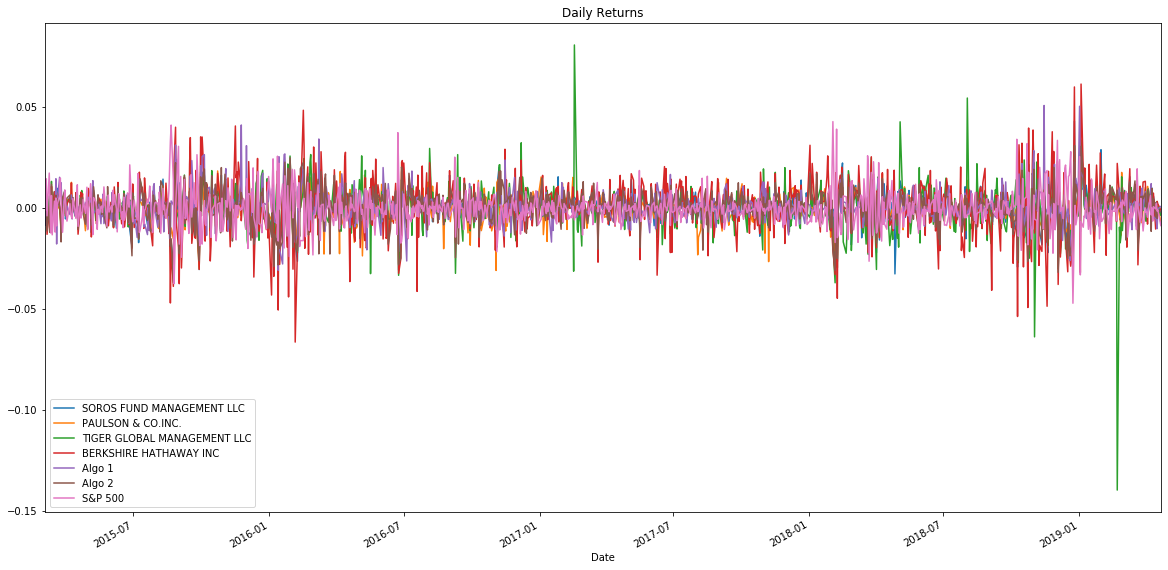

In [20]:
`# Plot daily returns
# YOUR CODE HERE

combined_df.plot(figsize=(20,10), title= "Daily Returns")

#combined_df.plot()


#cumulative_returns = (1 + daily_returns).cumprod() - 1cumulative_returns.plot()
#<matplotlib.axes._subplots.AxesSubplot at 0x1187c33c8>


#daily_returns.plot()
#daily_returns = combined_df.pct_change()
#daily_returns.head()
#daily_returns.plot()

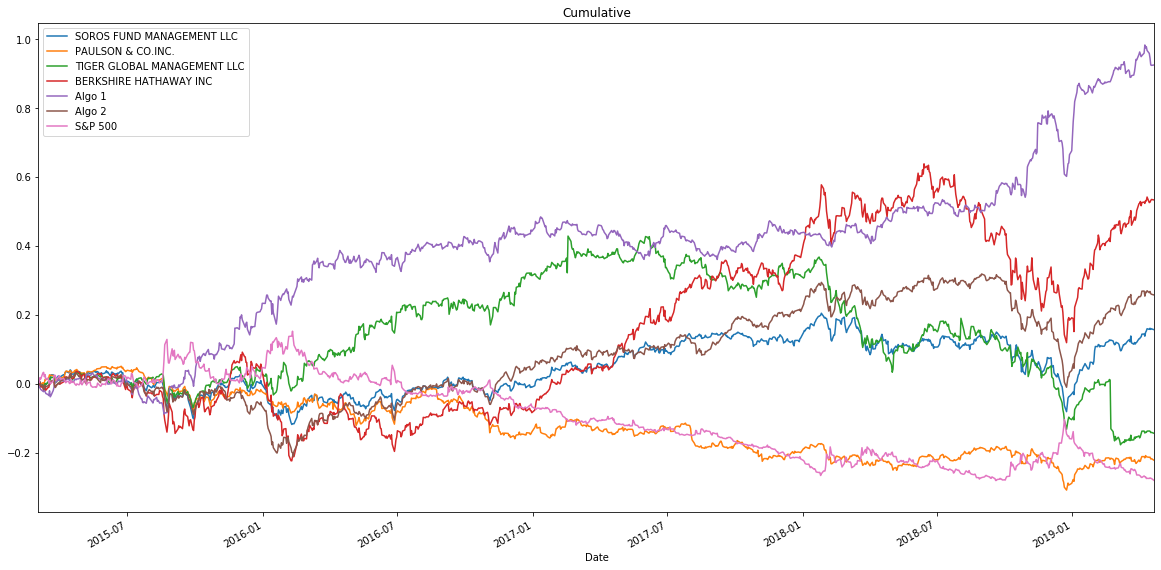

In [29]:
# Plot cumulative returns
# YOUR CODE HERE
#weights = [0.25, 0.25, 0.25, 0.25]
#portfolio_returns = daily_returns.dot(weights)
#portfolio_returns.head()
cumulative_returns = (1 + combined_df).cumprod()-1
cumulative_returns.plot(figsize=(20,10), title= "Cumulative")




---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

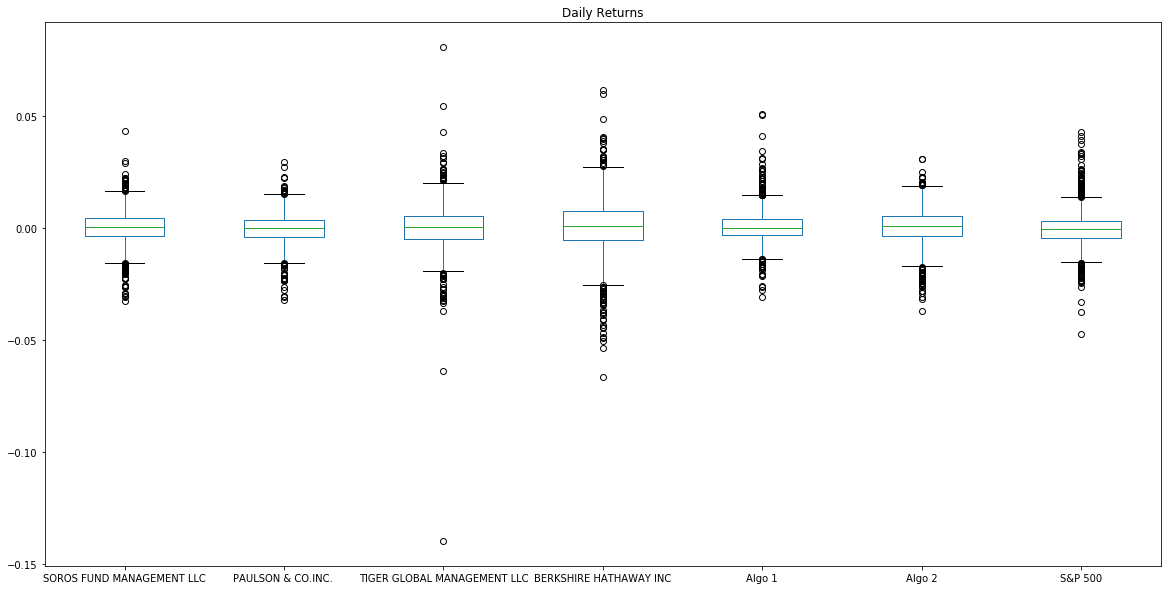

In [27]:
# Box plot to visually show risk --->google pandas 
# YOUR CODE H
combined_df.plot.box(figsize=(20,10), title= "Daily Returns")

In [34]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
combined_df.std()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [42]:
# Determine which portfolios are riskier than the S&P 500

combined_df.std()>combined_df['S&P 500'].std()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [24]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

combined_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

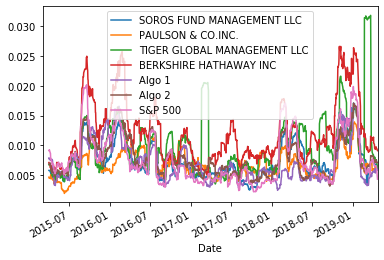

In [25]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_df.rolling(window=21).std().plot()
# YOUR CODE HERE

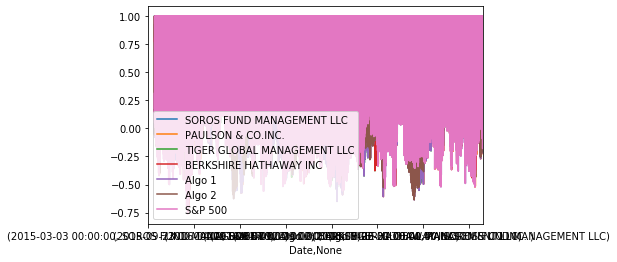

In [26]:
# Correlation
# YOUR CODE HERE
combined_df.rolling(window=21).corr().plot()

In [39]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = daily_returns['MSFT'].cov(daily_returns['SP500'])


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [40]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Read the first stock
# YOUR CODE HERE

In [ ]:
# Read the second stock
# YOUR CODE HERE

In [ ]:
# Read the third stock
# YOUR CODE HERE

In [ ]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [ ]:
# Reset the index
# YOUR CODE HERE

In [ ]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

In [ ]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# YOUR CODE HERE

In [ ]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE

In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
# YOUR CODE HERE